## **FINAL PAI PROJECT**

#### NAME: KAZIM ALI SHAH

#### REG NO: FA22-BAI-019

#### NAME: MUHAMMAD ABDUL SABOOR

#### REG NO: FA22-BAI-024

#### **DATASET INFORMATION:**
The dataset consists of image chips extracted from Planet satellite imagery collected over the San Franciso Bay area. It includes 4000 80x80 RGB images labeled with either a "ship" or "no-ship" classification. Image chips were derived from PlanetScope full-frame visual scene products, which are orthorectified to a 3 meter pixel size.  The pixel value data for each 80x80 RGB image is stored as a list of 19200 integers within of the data list. The first 6400 entries contain the red channel values, the next 6400 the green, and the final 6400 the blue. The image is stored in row-major order, so that the first 80 entries of the array are the red channel values of the first row of the image.

The "ship" class includes 1000 images. Images in this class are near-centered on the body of a single ship. Ships of different ship sizes, orientations, and atmospheric collection conditions are included.  The "no-ship" class includes 3000 images. A third of these are a random sampling of different landcover features - water, vegetion, bare earth, buildings, etc. - that do not include any portion of an ship. The next third are "partial ships" that contain only a portion of an ship, but not enough to meet the full definition of the "ship" class. The last third are images that have previously been mislabeled by machine learning models, typically caused by bright pixels or string linear features. Example images from this class are shown below.

# **Libraries:**

**Numpy:**
A powerful library for numerical computing in Python. It provides support for arrays, matrices, and many mathematical functions to operate on these data structures.

**Expand_dims:** Adds a new dimension to an array, often used to reshape data for specific algorithms.

**Pandas:** A library for data manipulation and analysis. It provides data structures like DataFrames to handle and analyze structured data easily.

**Json:** A module for parsing JSON (JavaScript Object Notation) data. It helps in reading and writing JSON data, which is a common format for data interchange.

**Matplotlib.pyplot:** A plotting library used for creating static, animated, and interactive visualizations in Python.

**Seaborn:** A data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

**cv2 (OpenCV):** A library for computer vision tasks. It provides tools for image processing, video capture, and analysis.

**skimage (scikit-image):** A collection of algorithms for image processing in Python.

**Tensorflow:** An open-source deep learning library developed by Google. It provides comprehensive tools for building and training machine learning models.

**Tensorflow.keras:** A high-level API in TensorFlow for building and training neural networks.

**sklearn (scikit-learn):** A machine learning library for Python. It offers simple and efficient tools for data mining and data analysis.


**to_categorical:** Converts a class vector (integers) to binary class matrix.

**scikeras.wrappers:** A bridge to use Keras models with scikit-learn.

**KerasClassifier:** Wraps a Keras model to be used as a classifier in scikit-learn.

**tensorflow.keras.models:** Defines and trains models in Keras.

**Sequential:** A linear stack of layers for building a model.

**tensorflow.keras.layers:** Provides layers for building neural networks.

**tensorflow.keras.optimizers:** Optimization algorithms for training neural networks.

**tensorflow.keras.preprocessing.image:** Utilities for image data preprocessing.

**tensorflow.keras.callbacks:** Utilities for performing actions at various stages of training.

**EarlyStopping:** Stops training when a monitored metric has stopped improving.

**keras:** An API for building and training deep learning models.

**sklearn.decomposition:** Implements dimensionality reduction techniques.

**sklearn.manifold:** Implements data manifold learning algorithms.

**TSNE (t-Distributed Stochastic Neighbor Embedding):** A technique for reducing dimensions and visualizing high-dimensional data.

**sklearn.cluster:** Implements clustering algorithms.

**KMeans:** A popular clustering algorithm that partitions data into K distinct clusters.

In [5]:
import numpy as np
from numpy import expand_dims
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from skimage import feature
import tensorflow
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from keras import callbacks
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

Importing the dataset from as a json file

In [6]:
with open("C:\\Users\\AWCD\\Downloads\\archive\\shipsnet.json") as data_file:
    dataset = json.load(data_file)
shipsnet= pd.DataFrame(dataset)
shipsnet.head()


data  labels  \
0  [82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...       1   
1  [76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...       1   
2  [125, 127, 129, 130, 126, 125, 129, 133, 132, ...       1   
3  [102, 99, 113, 106, 96, 102, 105, 105, 103, 10...       1   
4  [78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...       1   

                                   locations             scene_ids  
0    [-118.2254694333423, 33.73803725920789]  20180708_180909_0f47  
1    [-122.33222866289329, 37.7491755586813]  20170705_180816_103e  
2  [-118.14283073363218, 33.736016066914175]  20180712_211331_0f06  
3   [-122.34784341495181, 37.76648707436548]  20170609_180756_103a  
4   [-122.34852408322172, 37.75878462398653]  20170515_180653_1007

In [7]:
shipsnet.tail()

data  labels  \
3995  [126, 122, 124, 138, 165, 186, 195, 199, 203, ...       0   
3996  [130, 134, 139, 128, 117, 126, 141, 147, 142, ...       0   
3997  [171, 135, 118, 140, 145, 144, 154, 165, 139, ...       0   
3998  [85, 90, 94, 95, 94, 92, 93, 96, 93, 94, 94, 9...       0   
3999  [122, 122, 126, 126, 142, 153, 174, 190, 185, ...       0   

                                      locations             scene_ids  
3995   [-122.08693255500694, 37.77781408256089]  20170815_180821_102d  
3996   [-122.10549691828378, 37.76946626247702]  20170730_191230_0f21  
3997  [-122.48298739296371, 37.684929808845375]  20161116_180804_0e14  
3998   [-122.29028216570079, 37.71632091139081]  20170211_181116_0e16  
3999  [-122.49531387721586, 37.698557210117706]  20180206_184438_1043

In [8]:
shipsnet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data       4000 non-null   object
 1   labels     4000 non-null   int64 
 2   locations  4000 non-null   object
 3   scene_ids  4000 non-null   object
dtypes: int64(1), object(3)
memory usage: 125.1+ KB


In [9]:
print(shipsnet.describe())

            labels
count  4000.000000
mean      0.250000
std       0.433067
min       0.000000
25%       0.000000
50%       0.000000
75%       0.250000
max       1.000000


In [10]:
missing_values = shipsnet.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 data         0
labels       0
locations    0
scene_ids    0
dtype: int64


# **Exploratory Data Ananlysis:**

### Removing irrevelant columns

In [11]:
shipsnet = shipsnet[["data", "labels","locations"]]
shipsnet.head()

data  labels  \
0  [82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...       1   
1  [76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...       1   
2  [125, 127, 129, 130, 126, 125, 129, 133, 132, ...       1   
3  [102, 99, 113, 106, 96, 102, 105, 105, 103, 10...       1   
4  [78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...       1   

                                   locations  
0    [-118.2254694333423, 33.73803725920789]  
1    [-122.33222866289329, 37.7491755586813]  
2  [-118.14283073363218, 33.736016066914175]  
3   [-122.34784341495181, 37.76648707436548]  
4   [-122.34852408322172, 37.75878462398653]

In [12]:
len(shipsnet["data"].iloc[0])

19200

### As you can see, the pixel value data for each 80x80 RGB image is stored as a list of 19200 integers within the data list. The first 6400 entries contain the red channel values, the next 6400 the green, and the final 6400 the blue

In [13]:
no_ship_images = shipsnet["labels"].value_counts()[0]
ship_images = shipsnet["labels"].value_counts()[1]
print("Number of the no_ship_images :{}".format(no_ship_images),"\n")
print("Number of the ship_images :{}".format(ship_images))

Number of the no_ship_images :3000 

Number of the ship_images :1000


### Turning the json information into numpy array and then assign it as x and y variables:

In [14]:

x = np.array(dataset['data']).astype('uint8')
y = np.array(dataset['labels']).astype('uint8')

In [15]:
x.shape

(4000, 19200)

### The current data for each image is one row of flattened 19200 data points representing the RGB values of each pixel. So we need to reshape it. After reshaping, each item in new x variable will be 3 lists. Each of these lists will be RGB values for each pixel for the length and width of the image

In [16]:
x_reshaped = x.reshape([-1, 3, 80, 80])

x_reshaped.shape

(4000, 3, 80, 80)

### We need to change the order of the dimensions to get the correct format to plot the images. The last value of the shape of x_reshaped will be 3, this number represent the channel. (RGB)   

<img src="https://e2eml.school/images/image_processing/three_d_array.png" class="center" style="width:400px">



In [17]:
x_reshaped = x.reshape([-1, 3, 80, 80]).transpose([0,2,3,1])
x_reshaped.shape

(4000, 80, 80, 3)

In [18]:
y.shape

(4000,)

### The code snippet y_reshaped = to_categorical(y, num_classes=2) is used to convert the class vector y (integers) into a binary class matrix, which is often required for training neural networks, especially when dealing with classification problems.


In [19]:
y_reshaped = to_categorical(y, num_classes=2)

y_reshaped.shape

(4000, 2)

In [20]:
y_reshaped

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

<p>
<font size="5" face="Arial">
<h2 align="left"> Exploring the Images </h2>
</font>
</p>

## A quick look at images with and without ships

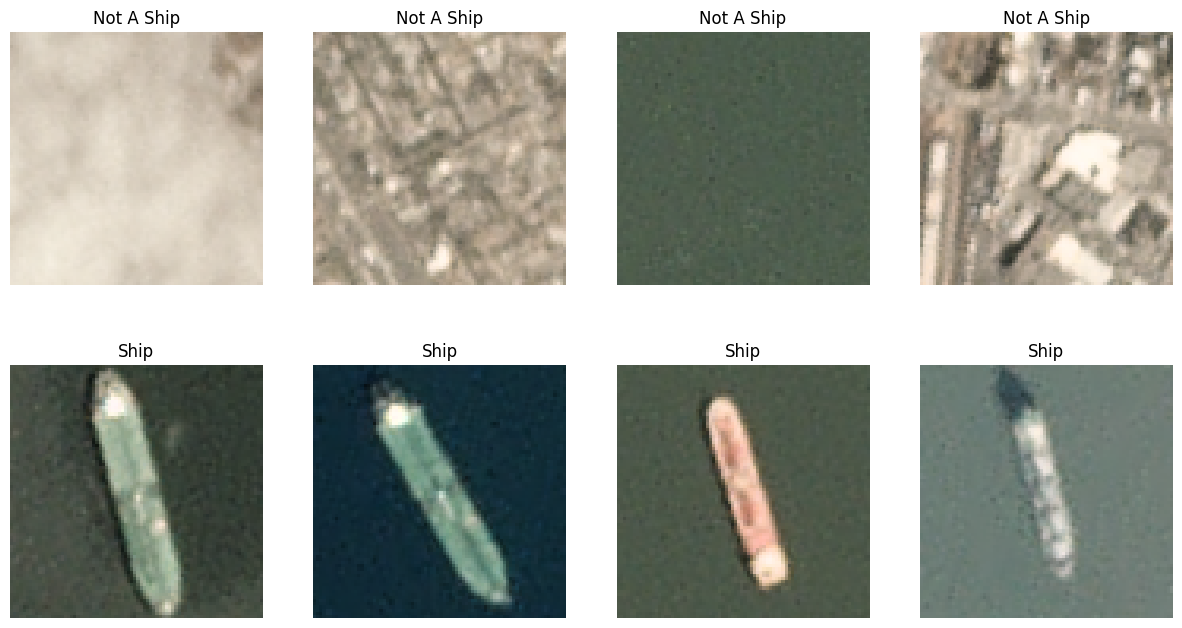

In [21]:
image_no_ship = x_reshaped[y==0]
image_ship = x_reshaped[y==1]

def plot(a,b):

    plt.figure(figsize=(15, 15))
    for i, k in enumerate(range(1,9)):
        if i < 4:
            plt.subplot(2,4,k)
            plt.title('Not A Ship')
            plt.imshow(image_no_ship[i+2])
            plt.axis("off")
        else:
            plt.subplot(2,4,k)
            plt.title('Ship')
            plt.imshow(image_ship[i+15])
            plt.axis("off")

    plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0.25)



plot(image_no_ship, image_ship)

### A quick look at pixel intensity of images

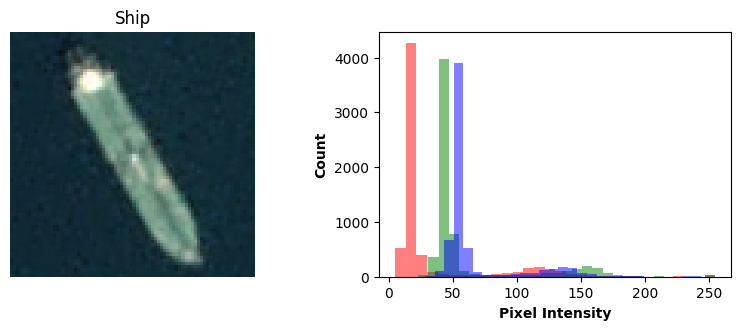

Minimum pixel value of this image: 5
Maximum pixel value of this image: 255


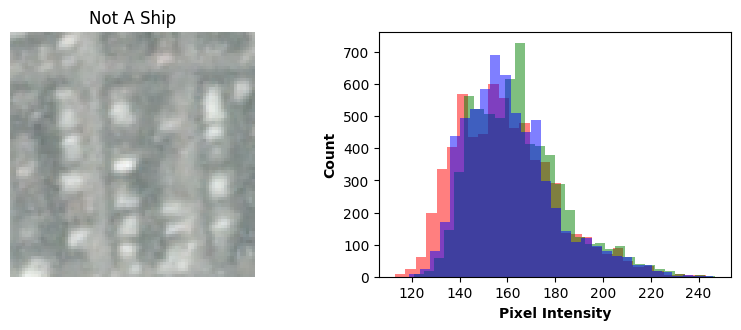

Minimum pixel value of this image: 113
Maximum pixel value of this image: 247


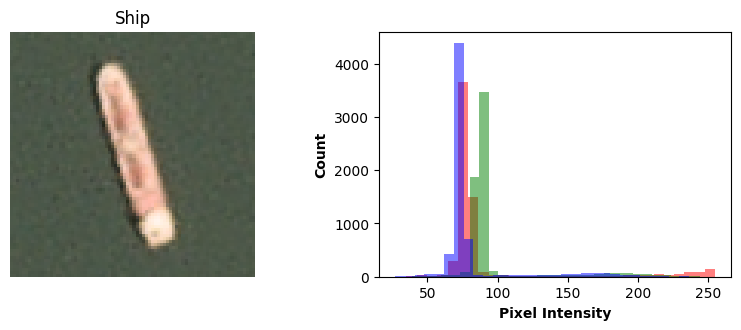

Minimum pixel value of this image: 27
Maximum pixel value of this image: 255


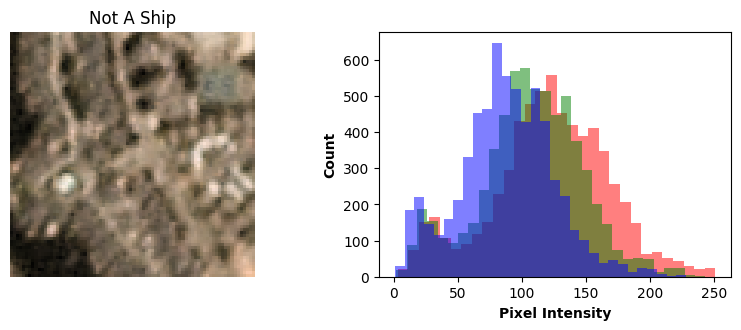

Minimum pixel value of this image: 1
Maximum pixel value of this image: 251


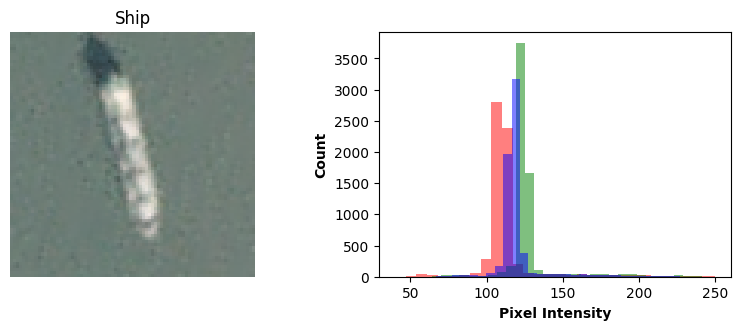

Minimum pixel value of this image: 40
Maximum pixel value of this image: 250


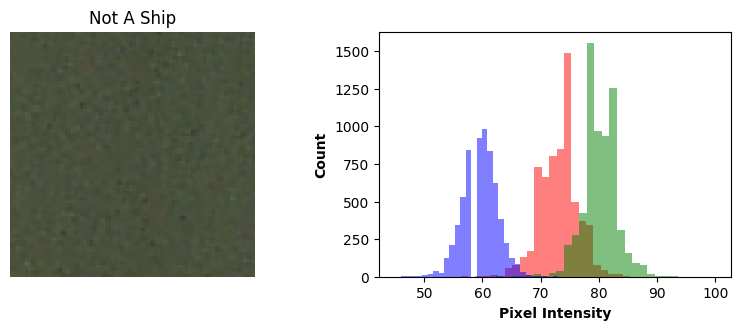

Minimum pixel value of this image: 45
Maximum pixel value of this image: 100


In [22]:
def plotHistogram(ship, not_ship):

    plt.figure(figsize = (10,7))
    plt.subplot(2,2,1)
    plt.imshow(ship)
    plt.axis('off')
    plt.title('Ship')
    histo = plt.subplot(2,2,2)
    histo.set_ylabel('Count', fontweight = "bold")
    histo.set_xlabel('Pixel Intensity', fontweight = "bold")
    n_bins = 30
    plt.hist(ship[:,:,0].flatten(), bins = n_bins, lw = 0, color = 'r', alpha = 0.5);
    plt.hist(ship[:,:,1].flatten(), bins = n_bins, lw = 0, color = 'g', alpha = 0.5);
    plt.hist(ship[:,:,2].flatten(), bins = n_bins, lw = 0, color = 'b', alpha = 0.5);
    plt.show()
    print("Minimum pixel value of this image: {}".format(ship.min()))
    print("Maximum pixel value of this image: {}".format(ship.max()))
    plt.figure(figsize = (10,7))
    plt.subplot(2,2,3)
    plt.imshow(not_ship)
    plt.axis('off')
    plt.title('Not A Ship')
    histo = plt.subplot(2,2,4)
    histo.set_ylabel('Count', fontweight = "bold")
    histo.set_xlabel('Pixel Intensity', fontweight = "bold")
    n_bins = 30
    plt.hist(not_ship[:,:,0].flatten(), bins = n_bins, lw = 0, color = 'r', alpha = 0.5);
    plt.hist(not_ship[:,:,1].flatten(), bins = n_bins, lw = 0, color = 'g', alpha = 0.5);
    plt.hist(not_ship[:,:,2].flatten(), bins = n_bins, lw = 0, color = 'b', alpha = 0.5);
    plt.show()
    print("Minimum pixel value of this image: {}".format(not_ship.min()))
    print("Maximum pixel value of this image: {}".format(not_ship.max()))


for i in range (20,23):
    plotHistogram(x_reshaped[y==1][i], x_reshaped[y==0][i])

### From Pixel intensity we can conclude that a picture with Ship has larger difference between maximum and minimum value as compared to picture with wo ship.

### Now let’s take a quick view of each channels in the two image.

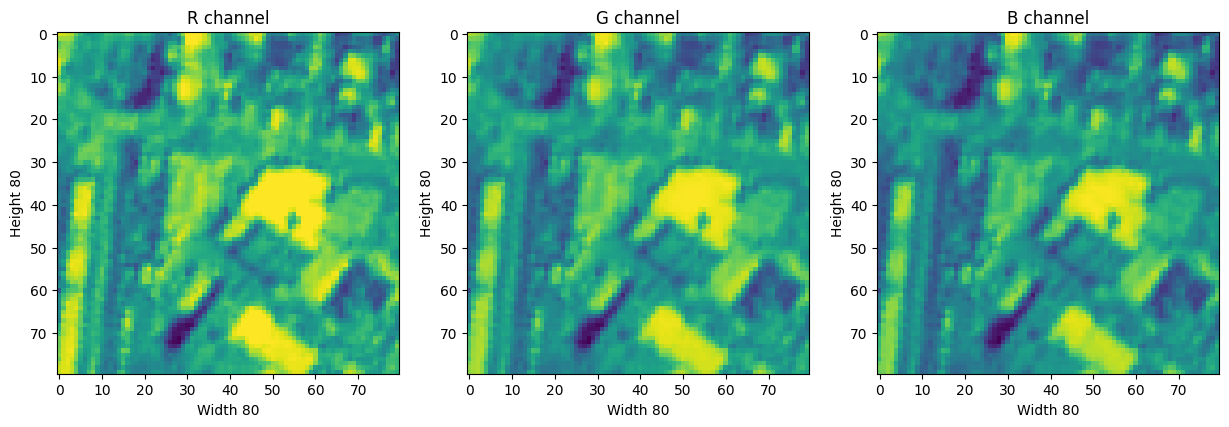

In [23]:
my_list = [(0, 'R channel'), (1, 'G channel'), (2, 'B channel')]

plt.figure(figsize = (15,15))

for i, k in my_list:
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.ylabel('Height {}'.format(x_reshaped[y==0][5].shape[0]))
    plt.xlabel('Width {}'.format(x_reshaped[y==0][5].shape[1]))
    plt.imshow(x_reshaped[y==0][5][ : , : , i])

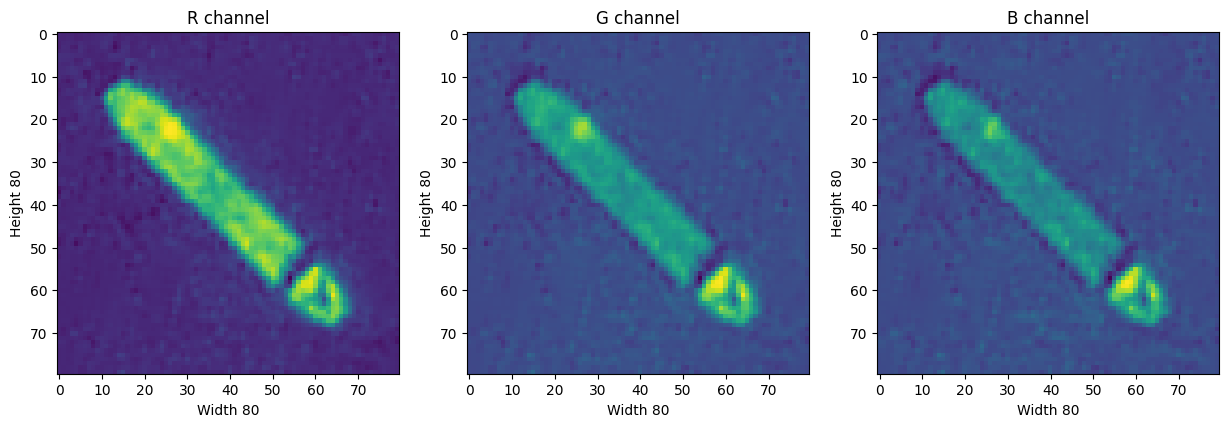

In [24]:
my_list = [(0, 'R channel'), (1, 'G channel'), (2, 'B channel')]

plt.figure(figsize = (15,15))

for i, k in my_list:
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.ylabel('Height {}'.format(x_reshaped[y==0][5].shape[0]))
    plt.xlabel('Width {}'.format(x_reshaped[y==0][5].shape[1]))
    plt.imshow(x_reshaped[y==1][5][ : , : , i])

### Now we will preprocess an image by detecting its edges, which is a crucial step in many computer vision tasks such as object detection. Edge detection helps to highlight the structural boundaries within an image, making it easier to analyze and interpret the visual content.

Image shape: (80, 80, 3)
Image data type: int32


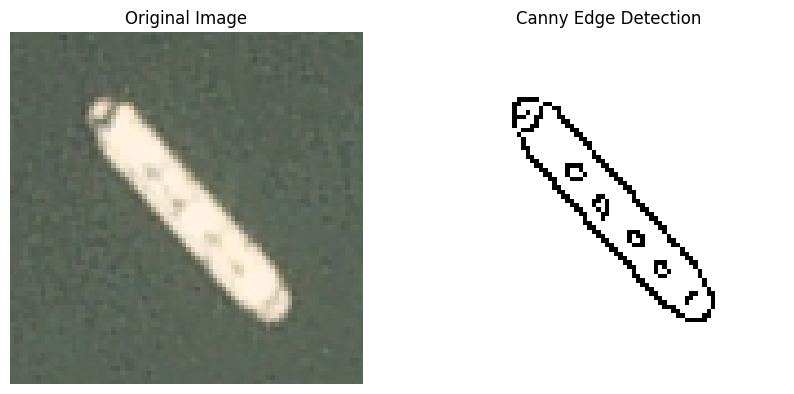

In [25]:
import cv2
from skimage import feature

image_index = 0
image = shipsnet['data'][image_index]

image_reshaped = np.array(image).reshape(3, 80, 80).transpose(1, 2, 0)

print("Image shape:", image_reshaped.shape)
print("Image data type:", image_reshaped.dtype)

image_reshaped = image_reshaped.astype(np.uint8)

gray_image = cv2.cvtColor(image_reshaped, cv2.COLOR_RGB2GRAY)

edges = feature.canny(gray_image, sigma=1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_reshaped)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='binary')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()


## Distribution of Ship and No-Ship images

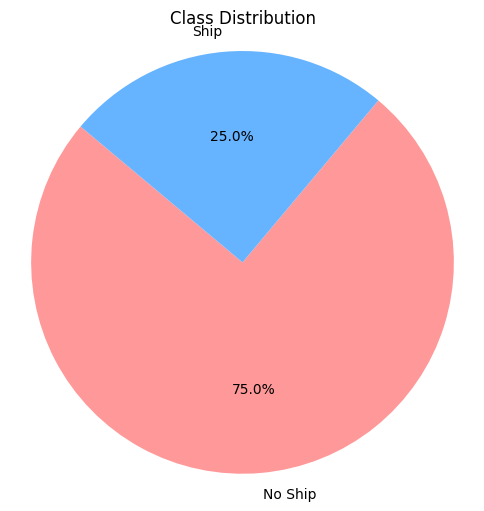

In [26]:
plt.figure(figsize=(6, 6))
labels = ['No Ship', 'Ship']
sizes = [no_ship_images, ship_images]
colors = ['#ff9999','#66b3ff']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Class Distribution')
plt.show()


### Now we visualize the geographic distribution of images in a dataset by plotting their locations on a scatter plot, with each point colored according to its class label (e.g., presence or absence of a ship).

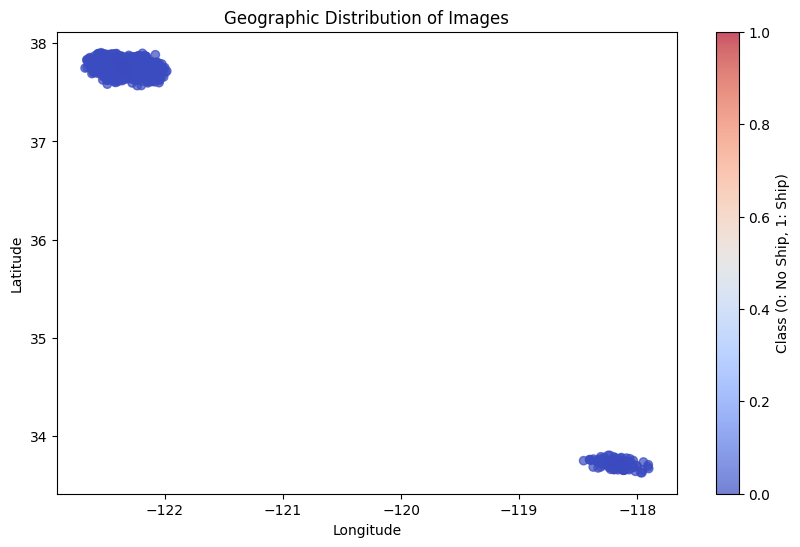

In [27]:
longitude_latitude = np.array(dataset['locations'], dtype=float)

df_locations = pd.DataFrame(longitude_latitude, columns=['Longitude', 'Latitude'])

df_locations['Label'] = y

plt.figure(figsize=(10, 6))
plt.scatter(df_locations['Longitude'], df_locations['Latitude'], c=df_locations['Label'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Class (0: No Ship, 1: Ship)')
plt.title('Geographic Distribution of Images')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Now we define a function plot_intensity_histograms that plots intensity histograms for ship and no-ship images. It separates images based on their class labels, flattens the images, and then plots histograms of pixel intensity values for each color channel (RGB) separately. The purpose is to visualize the distribution of pixel intensities in images belonging to different classes, helping to understand the contrast and brightness characteristics of ship and no-ship images.

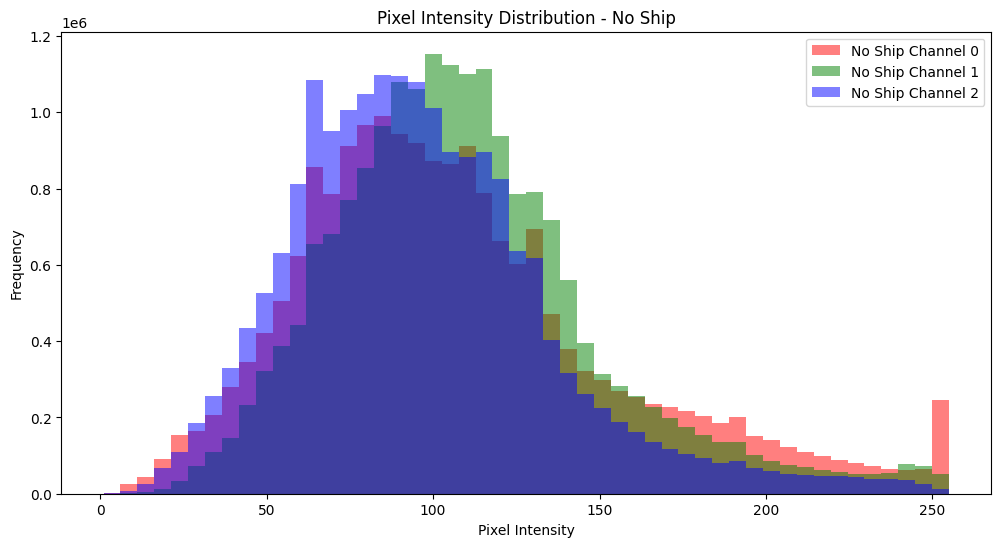

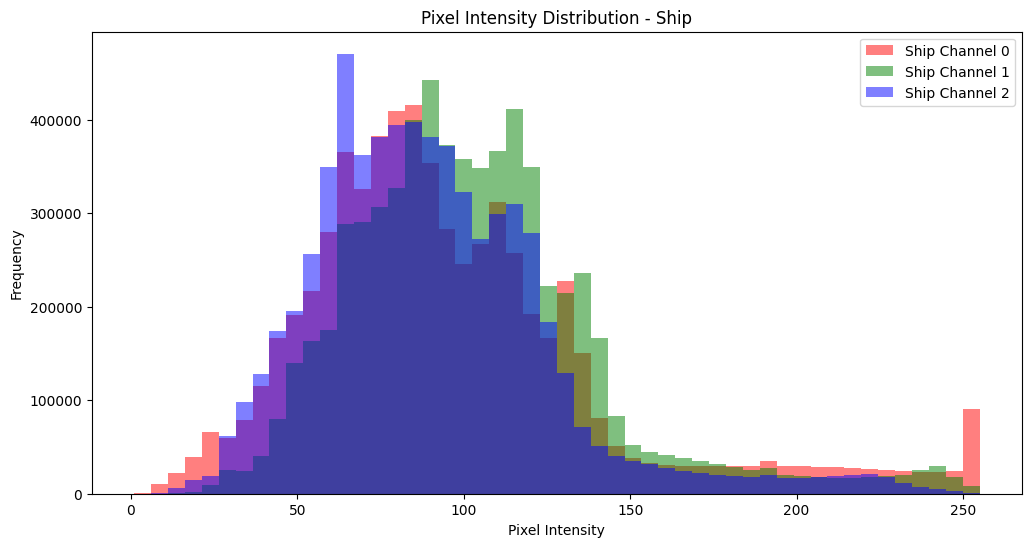

In [28]:

def plot_intensity_histograms(images, labels, class_label, title):
    plt.figure(figsize=(12, 6))
    color = ['r', 'g', 'b']
    for i in range(3):
        channel_values = images[labels == class_label, :, :, i].flatten()
        plt.hist(channel_values, bins=50, color=color[i], alpha=0.5, label=f'{title} Channel {i}')
    plt.title(f'Pixel Intensity Distribution - {title}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


plot_intensity_histograms(x_reshaped, y, class_label=0, title='No Ship')
plot_intensity_histograms(x_reshaped, y, class_label=1, title='Ship')


### Now we define a function compute_pixel_statistics that computes and displays pixel statistics for images belonging to different classes (ship and no-ship). It calculates the mean, standard deviation, minimum, and maximum pixel values separately for each color channel (RGB) within the images of a specified class. The purpose is to provide insights into the pixel intensity distribution and variability within each class, aiding in understanding the characteristics of ship and no-ship images.






In [29]:
def compute_pixel_statistics(images, labels, class_label):
    means = images[labels == class_label].mean(axis=(0, 1, 2))
    stds = images[labels == class_label].std(axis=(0, 1, 2))
    mins = images[labels == class_label].min(axis=(0, 1, 2))
    maxs = images[labels == class_label].max(axis=(0, 1, 2))
    print(f'Statistics for class {class_label} ({"Ship" if class_label == 1 else "No Ship"}):')
    print(f'Mean: {means}')
    print(f'Standard Deviation: {stds}')
    print(f'Minimum: {mins}')
    print(f'Maximum: {maxs}')
    print()


compute_pixel_statistics(x_reshaped, y, class_label=0)  # No Ship
compute_pixel_statistics(x_reshaped, y, class_label=1)  # Ship


Statistics for class 0 (No Ship):
Mean: [107.57148385 109.77985292  96.47623818]
Standard Deviation: [48.68785538 40.51653758 39.24323501]
Minimum: [1 1 1]
Maximum: [255 255 255]

Statistics for class 1 (Ship):
Mean: [ 97.43901313 103.41397469  90.39466203]
Standard Deviation: [46.83056643 38.05479652 36.41088708]
Minimum: [1 1 1]
Maximum: [255 255 255]



### Here we compute the correlation matrix for the mean RGB values of images and visualize it as a heatmap using Seaborn. The purpose is to understand the linear relationship between the mean pixel values of different color channels (Red, Green, and Blue) within the images, providing insights into the color composition and relationships between channels.

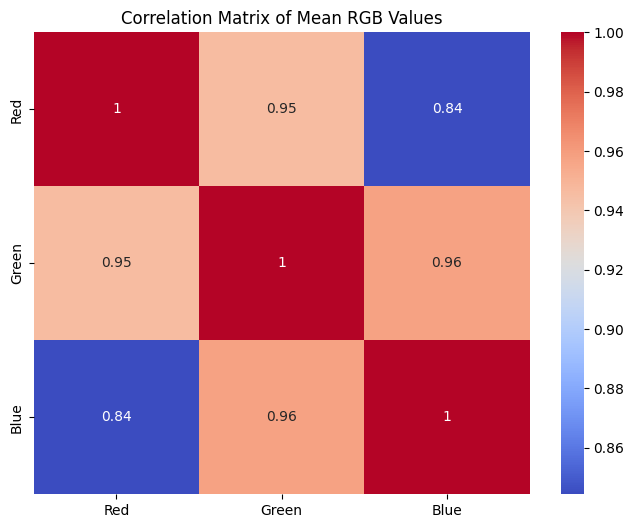

In [30]:
import seaborn as sns

mean_values_per_image = x_reshaped.mean(axis=(1, 2))
df_mean_values = pd.DataFrame(mean_values_per_image, columns=['Red', 'Green', 'Blue'])

plt.figure(figsize=(8, 6))
sns.heatmap(df_mean_values.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Mean RGB Values')
plt.show()


### Now we calculate the width and height of each image in a dataset and plot histogram to visualize the distributions of image widths and heights. The purpose is to understand the variability in image dimensions within the dataset, which can be important for preprocessing and understanding the characteristics of the images.

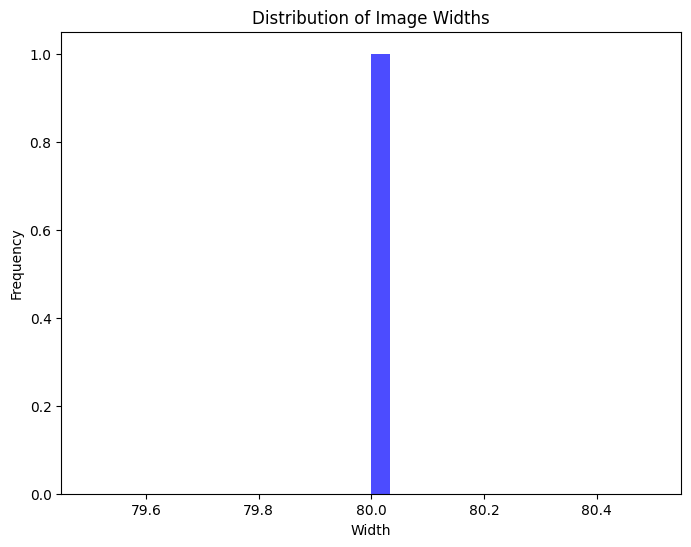

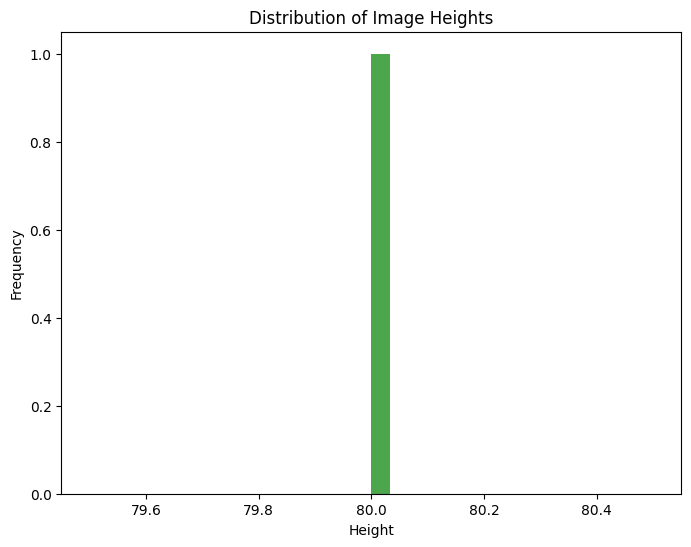

In [31]:
widths = x_reshaped.shape[2]
heights = x_reshaped.shape[1]

plt.figure(figsize=(8, 6))
plt.hist(widths, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Image Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(heights, bins=30, color='green', alpha=0.7)
plt.title('Distribution of Image Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()


#Augmentation

This code defines an image data generator with augmentation parameters such as rotation, shift, shear, zoom, and flips. It then applies this generator to a sample image, generating augmented versions of the image. The purpose is to create additional training data by applying various transformations to the original images, which helps improve the model's ability to generalize and enhances its performance. The generated augmented images can be used to enrich the training dataset and make the model more robust to variations in input data.

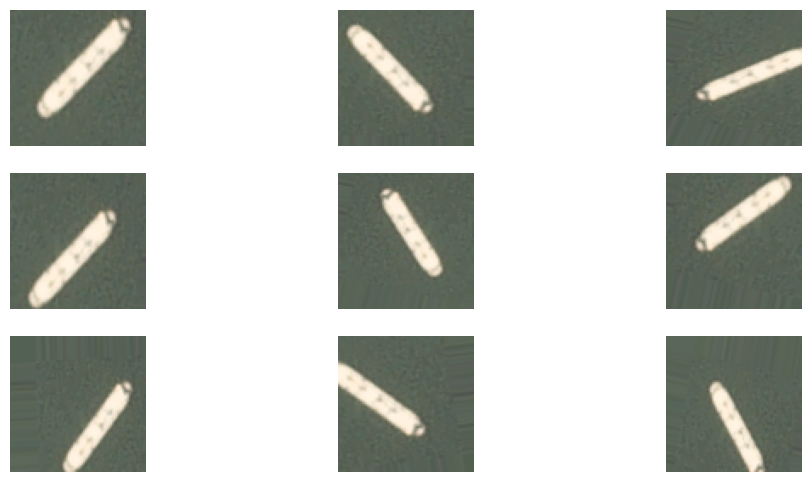

In [32]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')
x_normalized = x_reshaped / 255.0

sample_image = x_normalized[0]

sample_image = expand_dims(sample_image, axis=0)

augmented_images = datagen.flow(sample_image)

plt.figure(figsize=(12, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0][0])
    plt.axis('off')
plt.show()


# Data Decomposition

### PCA

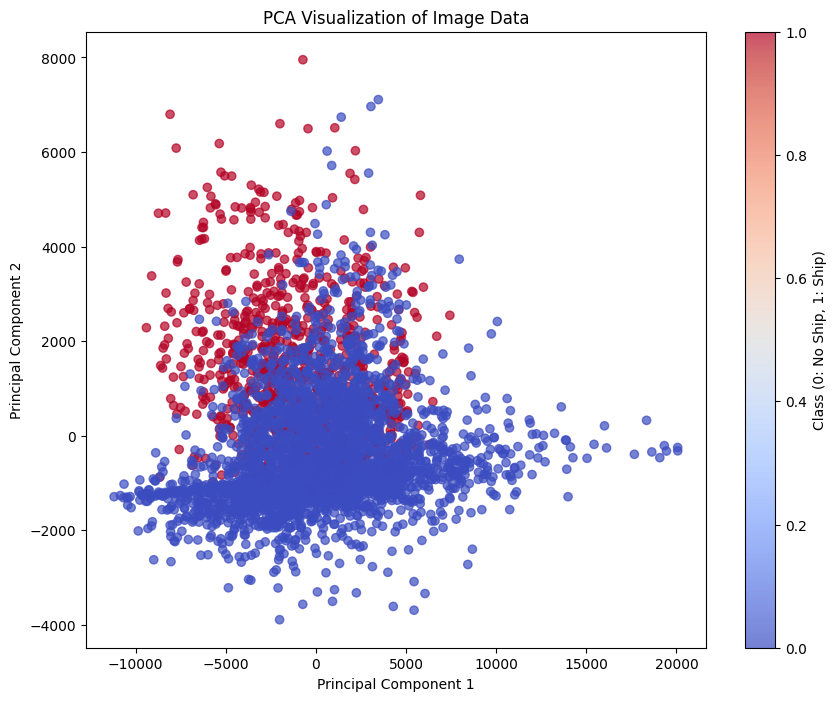

In [33]:
from sklearn.decomposition import PCA

x_flattened = x_reshaped.reshape(x_reshaped.shape[0], -1)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_flattened)

plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.title('PCA Visualization of Image Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class (0: No Ship, 1: Ship)')
plt.show()


### t-Distributed Stochastic Neighbor Embedding (t-SNE)

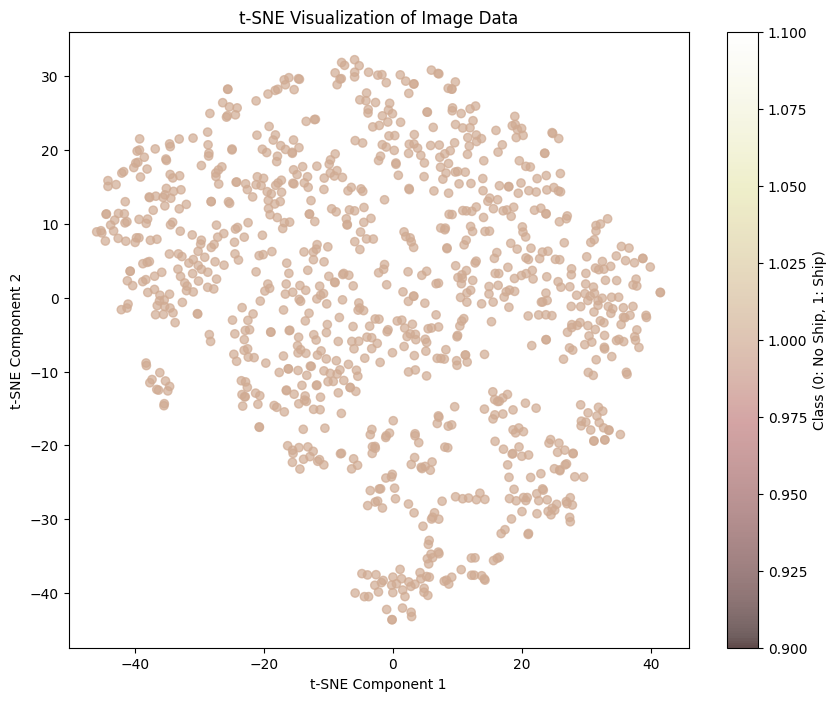

In [34]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(x_flattened[:1000])

plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y[:1000], cmap='pink', alpha=0.7)
plt.title('t-SNE Visualization of Image Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Class (0: No Ship, 1: Ship)')
plt.show()


### Singular Value Decomposition (SVD)

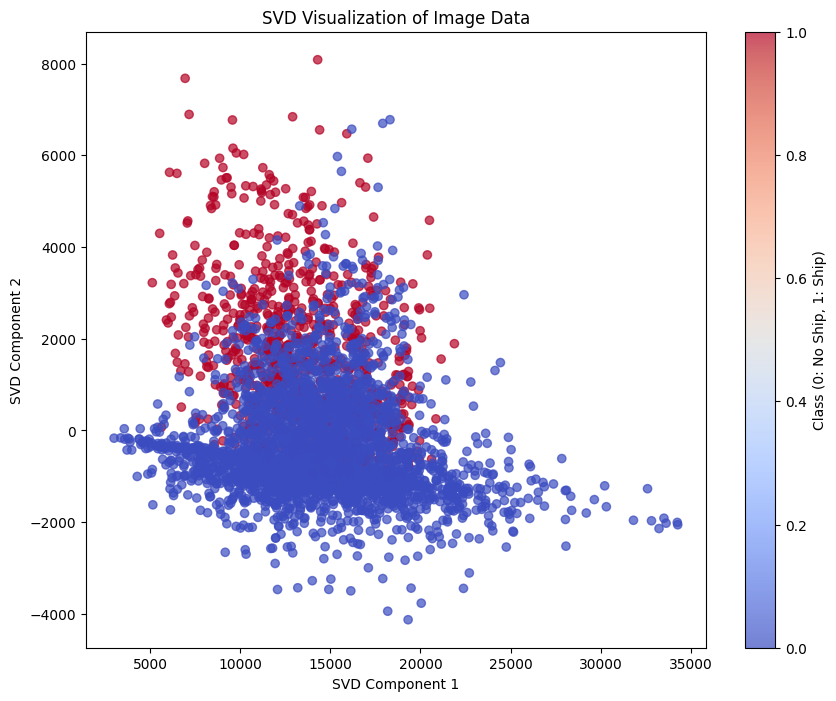

In [35]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

x_flattened_2d = x_flattened.reshape(x_flattened.shape[0], -1)

n_components = 2

svd = TruncatedSVD(n_components=n_components, random_state=42)

svd_projection = svd.fit_transform(x_flattened_2d)

plt.figure(figsize=(10, 8))
plt.scatter(svd_projection[:, 0], svd_projection[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.title('SVD Visualization of Image Data')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.colorbar(label='Class (0: No Ship, 1: Ship)')
plt.show()



### Now we calculate the brightness and contrast measures for each image in the dataset.

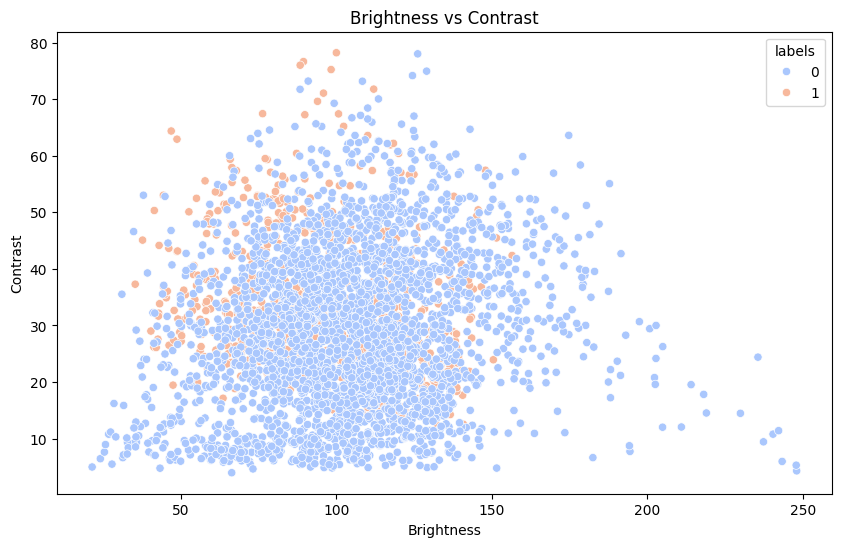

In [36]:
shipsnet['brightness'] = shipsnet['data'].apply(lambda img: np.mean(img))
shipsnet['contrast'] = shipsnet['data'].apply(lambda img: np.std(img))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=shipsnet, x='brightness', y='contrast', hue='labels', palette='coolwarm')
plt.title('Brightness vs Contrast')
plt.xlabel('Brightness')
plt.ylabel('Contrast')
plt.show()


### PCA

In [37]:
from sklearn.decomposition import PCA
import numpy as np
# Flatten each image in the dataset
x_flattened = np.array([np.array(img).flatten() for img in shipsnet['data']])

# Perform PCA
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(x_flattened)

# Add PCA components to the DataFrame
shipsnet['pca_one'] = pca_components[:, 0]
shipsnet['pca_two'] = pca_components[:, 1]


Now we generate a pairplot using Seaborn to visualize the pairwise relationships between selected columns ('brightness', 'contrast', 'pca_one', 'pca_two') in the DataFrame shipsnet. The pairplot displays scatterplots of each pair of variables along the diagonal and scatterplots with regression lines on the off-diagonal, along with histograms on the diagonal. The purpose is to explore the relationships between these variables and identify any potential patterns or correlations among them in a single comprehensive visualization.

<Figure size 1000x800 with 0 Axes>

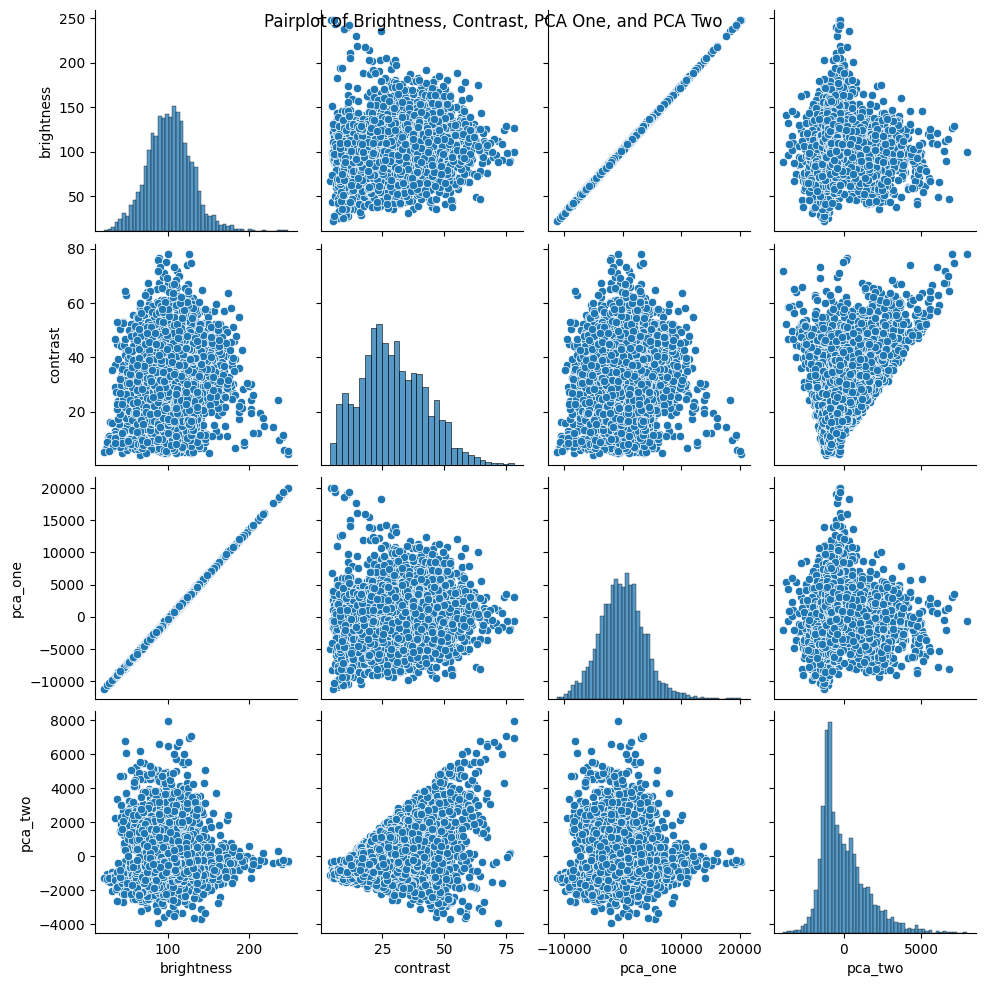

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['brightness', 'contrast', 'pca_one', 'pca_two']

plt.figure(figsize=(10, 8))
sns.pairplot(shipsnet[columns])
plt.suptitle('Pairplot of Brightness, Contrast, PCA One, and PCA Two')
plt.show()


### Boxplot

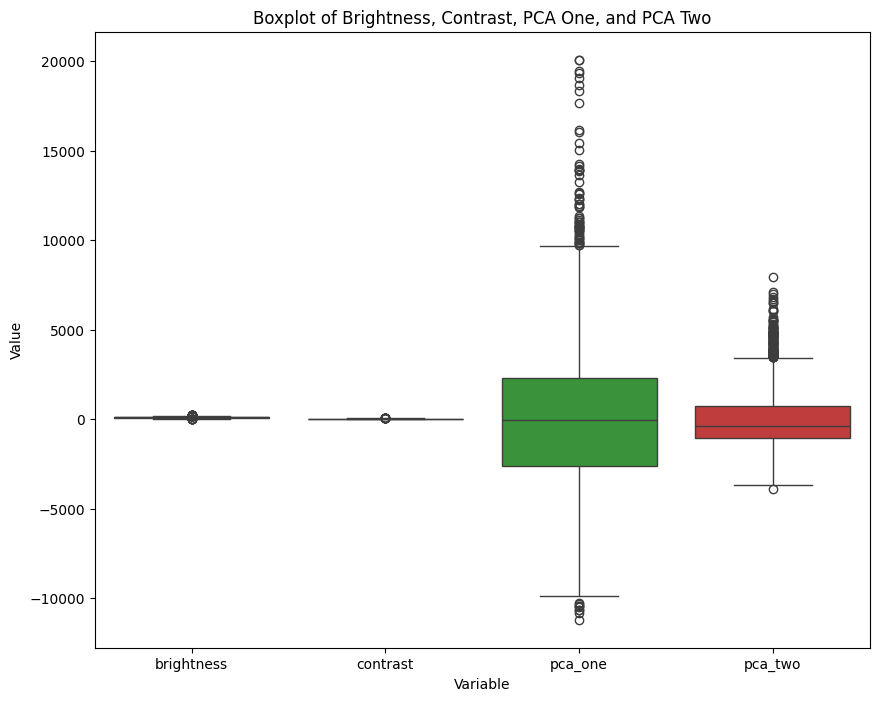

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['brightness', 'contrast', 'pca_one', 'pca_two']

plt.figure(figsize=(10, 8))
sns.boxplot(data=shipsnet[columns])
plt.title('Boxplot of Brightness, Contrast, PCA One, and PCA Two')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()


### Correlation Matrix of brightness, contrast, pca_one and pca_two

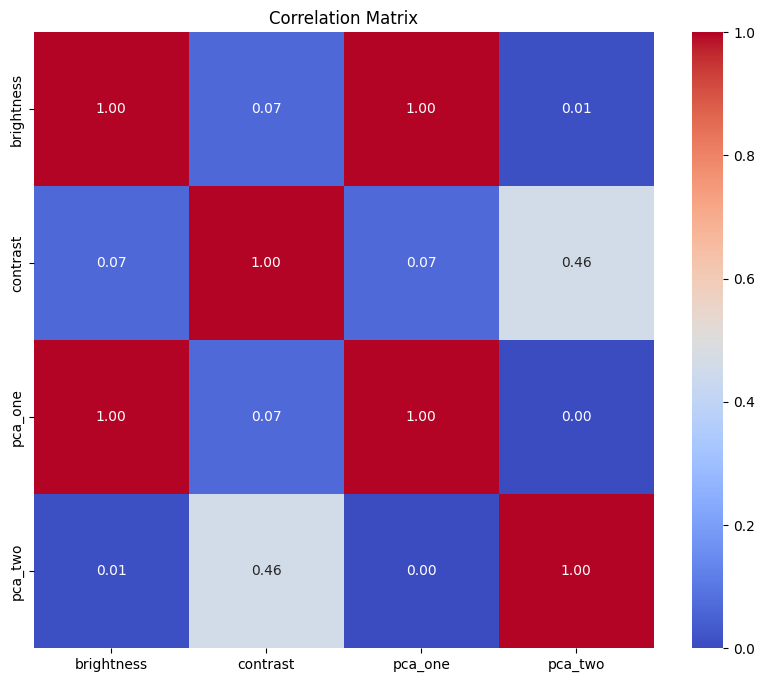

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(shipsnet[['brightness', 'contrast', 'pca_one', 'pca_two']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### Distribution of Brightness and Contrast

The purpose is to visualize and compare the distributions of brightness and contrast values within the dataset. This helps in understanding the overall range, central tendency, and spread of these two image characteristics, as well as identifying any patterns or differences between their distributions.

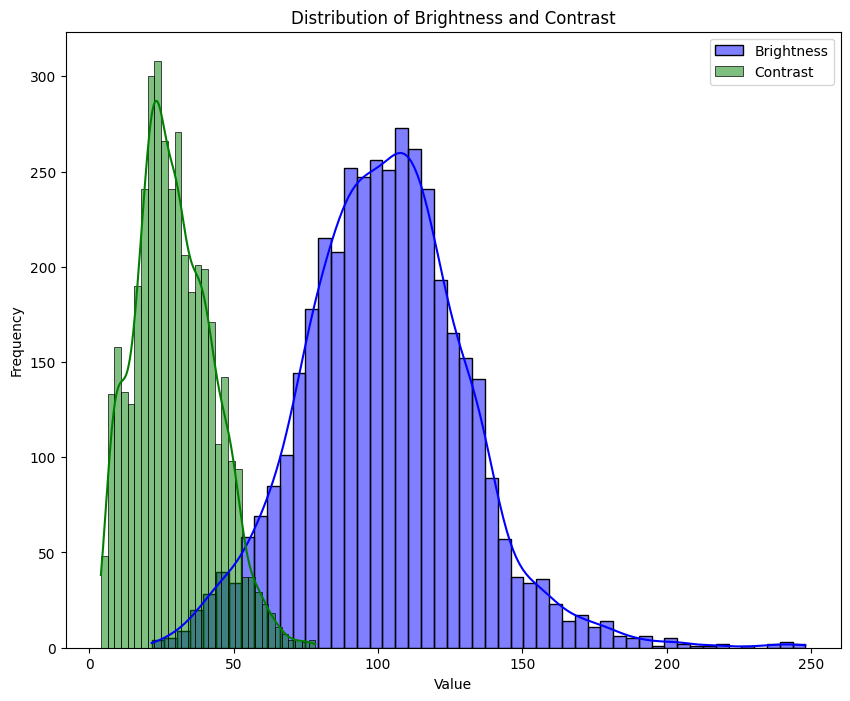

In [41]:
plt.figure(figsize=(10, 8))
sns.histplot(shipsnet['brightness'], kde=True, color='blue', label='Brightness')
sns.histplot(shipsnet['contrast'], kde=True, color='green', label='Contrast')
plt.title('Distribution of Brightness and Contrast')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Violin Plot

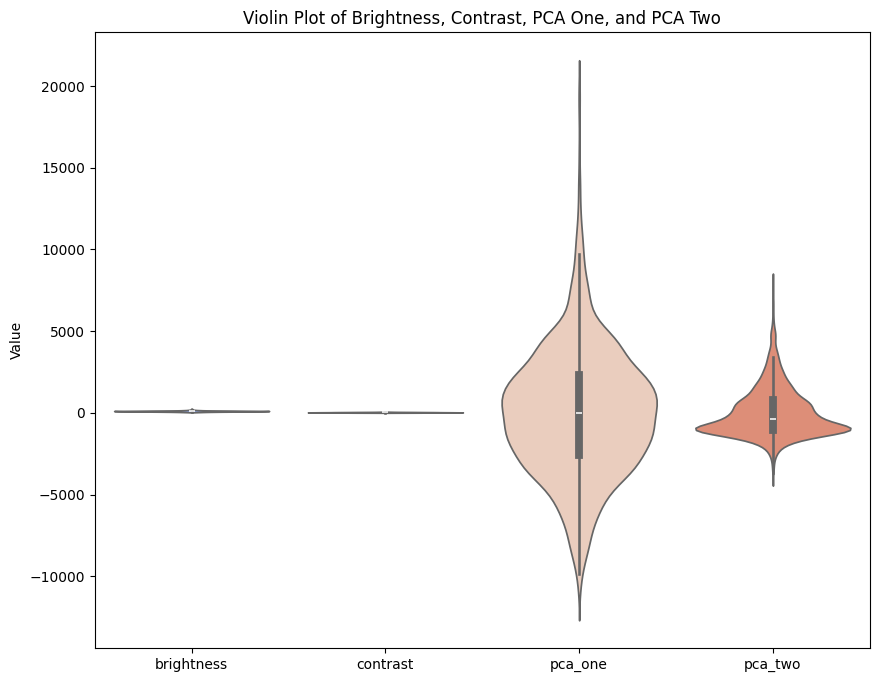

In [42]:
plt.figure(figsize=(10, 8))
sns.violinplot(data=shipsnet[['brightness', 'contrast', 'pca_one', 'pca_two']], palette='coolwarm')
plt.title('Violin Plot of Brightness, Contrast, PCA One, and PCA Two')
plt.ylabel('Value')
plt.show()


### K-means Clustering

Now we perform K-means clustering on the PCA-reduced image data to group the images into 5 clusters. It then visualizes these clusters by plotting the PCA components with different colors representing different clusters. The purpose is to identify and visualize natural groupings or patterns within the dataset based on the reduced-dimensional features, which can provide insights into the structure of the data and potential categories within the images.

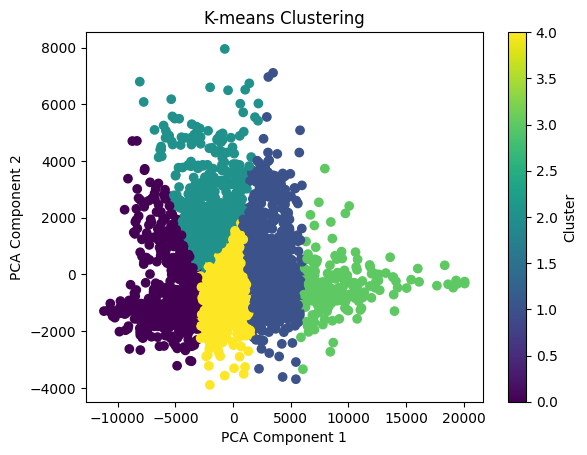

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(pca_components)

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()


# Modelling


## Preparing of Train and Test Data

### First step is normalizing x data

In [44]:
x_reshaped = x_reshaped / 255

In [45]:
x_reshaped[0][0][0]

array([0.32156863, 0.36862745, 0.31372549])

Here we visualize the distribution of pixel intensities for each color channel. This helps in understanding the color composition and intensity variations within the image, providing insights into the image's color characteristics.






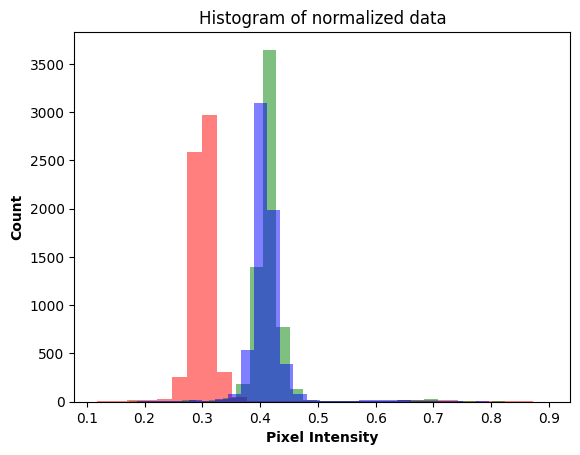

In [46]:
n_bins = 30
plt.hist(x_reshaped[y == 0][0][:,:,0].flatten(), bins = n_bins, lw = 0, color = 'r', alpha = 0.5);
plt.hist(x_reshaped[y == 0][0][:,:,1].flatten(), bins = n_bins, lw = 0, color = 'g', alpha = 0.5);
plt.hist(x_reshaped[y == 0][0][:,:,2].flatten(), bins = n_bins, lw = 0, color = 'b', alpha = 0.5);
plt.ylabel('Count', fontweight = "bold")
plt.xlabel('Pixel Intensity', fontweight = "bold")
plt.title("Histogram of normalized data")
plt.show()

### Data is ready for splitting as train and test

In [47]:
x_train_1, x_test, y_train_1, y_test = train_test_split(x_reshaped, y_reshaped,
                                                        test_size = 0.20, random_state = 42)


x_train, x_val, y_train, y_val = train_test_split(x_train_1, y_train_1,
                                                  test_size = 0.25, random_state = 42)


print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)
print("y_train shape",x_val.shape)
print("y_test shape",y_val.shape)

x_train shape (2400, 80, 80, 3)
x_test shape (800, 80, 80, 3)
y_train shape (2400, 2)
y_test shape (800, 2)
y_train shape (800, 80, 80, 3)
y_test shape (800, 2)


In [48]:
x_train.shape

(2400, 80, 80, 3)

# Implementation of Convolutional Neural Network (CNN)

The purpose of Convolutional Neural Networks (CNNs) is to process and analyze visual data efficiently. Key points include:

**Feature Extraction:** Automatically learns relevant features from images.

**Spatial Hierarchies:** Builds a layered understanding from simple to complex patterns.

**Translation Invariance:** Recognizes objects regardless of their position.

**Parameter Sharing:** Reduces the number of parameters, making learning more efficient.

**Handling Large Inputs:** Reduces data dimensionality to manage large images.

**End-to-End Learning:** Trains directly from raw images to final output using backpropagation.

CNNs are widely used for tasks like image classification, object detection, and segmentation due to these strengths.

### In this scenario, the training process stopped at epoch 77 because the validation loss did not improve for 10 consecutive epochs, indicating that the model had likely reached its optimal performance by that point and further training would not yield better results. This prevents overfitting and saves computational resources.

In [49]:
from keras import callbacks
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (4,4),padding = 'Same',
                 activation ='relu', input_shape = (80,80,3)))
model.add(MaxPool2D(pool_size=(5,5)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(3,3), strides=(1,1)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (2,2),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(3,3), strides=(1,1)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(200, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(100, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(100, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(50, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])


earlystopping = callbacks.EarlyStopping(monitor ="val_loss",
                                        mode ="min", patience = 10,
                                        restore_best_weights = True)
history = model.fit(x_train, y_train, epochs = 100, validation_data=(x_val, y_val), callbacks = [earlystopping])
model.evaluate(x_test, y_test)





c:\Users\AWCD\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.6875 - loss: 0.6445 - val_accuracy: 0.7513 - val_loss: 0.5563
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.7646 - loss: 0.4759 - val_accuracy: 0.7513 - val_loss: 0.3571
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.7821 - loss: 0.3461 - val_accuracy: 0.8863 - val_loss: 0.3106
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.8798 - loss: 0.3074 - val_accuracy: 0.8575 - val_loss: 0.3213
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.8840 - loss: 0.2888 - val_accuracy: 0.8988 - val_loss: 0.2294
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.9247 - loss: 0.2074 - val_accuracy: 0.9137 - val_loss: 0.1894
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.9182 - loss: 0.2056 - val_accuracy: 0.9262 - val_loss: 0.1827
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 0.9223 - loss: 0.2027 - val_accuracy: 

[0.059389375150203705, 0.9837499856948853]

# Classification Report:


The classification report provides a concise summary of the model's performance in distinguishing between "Ship" and "Not A Ship" classes. Using the true labels and the predicted class labels , it generates metrics such as precision, recall, and F1-score for each class. The heatmap visualization offers a quick and intuitive representation of these metrics, with color-coded cells indicating the corresponding values.

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


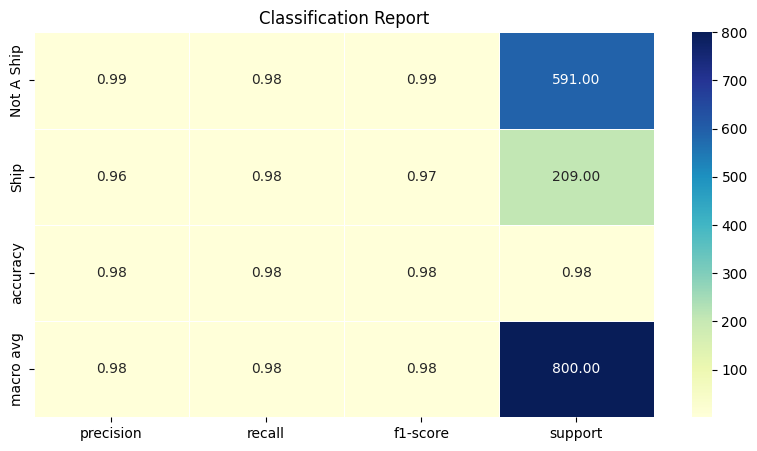

In [50]:
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)

target_names = ["Not A Ship", "Ship"]
report_dict = classification_report(Y_true, Y_pred_classes, target_names=target_names, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

plt.figure(figsize=(10, 5))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title('Classification Report')
plt.show()

### Evaluating Performance

In [51]:
model.evaluate(x_test, y_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9815 - loss: 0.0621


[0.059389375150203705, 0.9837499856948853]

### Now we create a plot of the training history, visualizing the loss and accuracy metrics recorded during the training process of the neural network model.

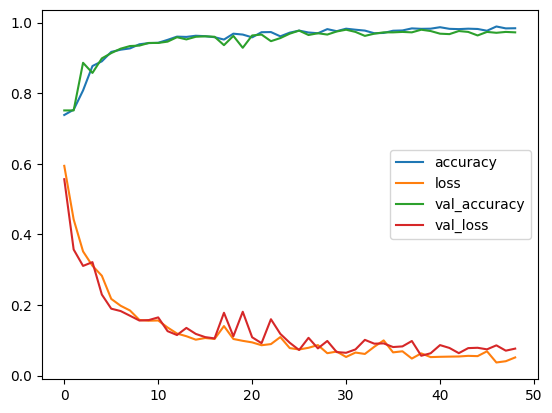

In [52]:
pd.DataFrame(history.history).plot();

### Data Augmentation

Data augmentation is a strategy that enables practitioners to significantly increase the diversity of data available for training models, without actually collecting new data. Data augmentation techniques such as cropping, padding, and horizontal flipping are commonly used to train large neural networks

In [53]:
from numpy import expand_dims
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=5,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

datagen.fit(x_train)

In [54]:
data = x_reshaped[y == 1][15]

samples = expand_dims(data, 0)

datag = ImageDataGenerator(
    brightness_range=[0.2, 1.0],
    zoom_range=[0.5, 1.0],
    horizontal_flip=True,
    rotation_range=90
)

it = datag.flow(samples, batch_size=1)


### Now I will apply data augmentation to train data and fit again

In [55]:
history = model.fit(datagen.flow(x_train, y_train), epochs = 100,
                    validation_data=(x_val, y_val), callbacks = [earlystopping])

Epoch 1/100


c:\Users\AWCD\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - accuracy: 0.9141 - loss: 0.2936 - val_accuracy: 0.9638 - val_loss: 0.1146
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.9317 - loss: 0.1689 - val_accuracy: 0.9688 - val_loss: 0.1056
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - accuracy: 0.9656 - loss: 0.1030 - val_accuracy: 0.9413 - val_loss: 0.1713
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - accuracy: 0.9325 - loss: 0.1750 - val_accuracy: 0.9663 - val_loss: 0.1018
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 157ms/step - accuracy: 0.9459 - loss: 0.1334 - val_accuracy: 0.9688 - val_loss: 0.0904
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - accuracy: 0.9553 - loss: 0.1238 - val_accuracy: 0.9663 - val_loss: 0.0937
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.9581 - loss: 0.1093 - val_accuracy: 0.9700 - val_loss: 0.0967
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - accuracy: 0.9627 - loss: 0.1133 - val_accuracy: 0

In [56]:
model.evaluate(x_test, y_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9724 - loss: 0.1007


[0.10701379179954529, 0.9700000286102295]

### Here we evaluate the performance of the trained neural network model on the test dataset and visualize the results. Here's a brief explanation:

**Accuracy Score:** Computes and prints the accuracy score of the model on the test data using sklearn's accuracy_score function.

**Accuracy and Loss Plots:** Plots the training and validation accuracy over epochs to assess the model's learning progress and potential overfitting. Also, plots the test loss over epochs to evaluate the model's performance.

Confusion Matrix: **bold text** Computes the confusion matrix to visualize the performance of the model in terms of true positive, true negative, false positive, and false negative predictions. Then, plots the confusion matrix using seaborn's heatmap to provide insights into the model's classification performance across different classes.

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

Test Accuracy Score :  0.97 



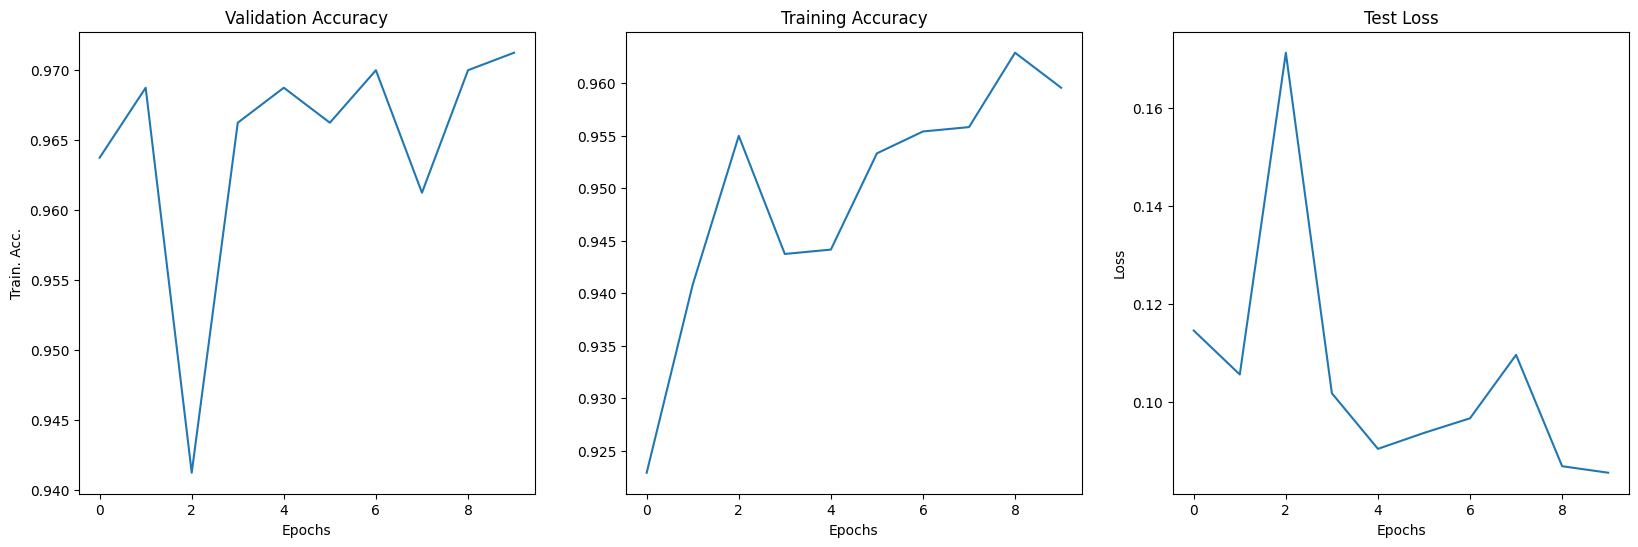

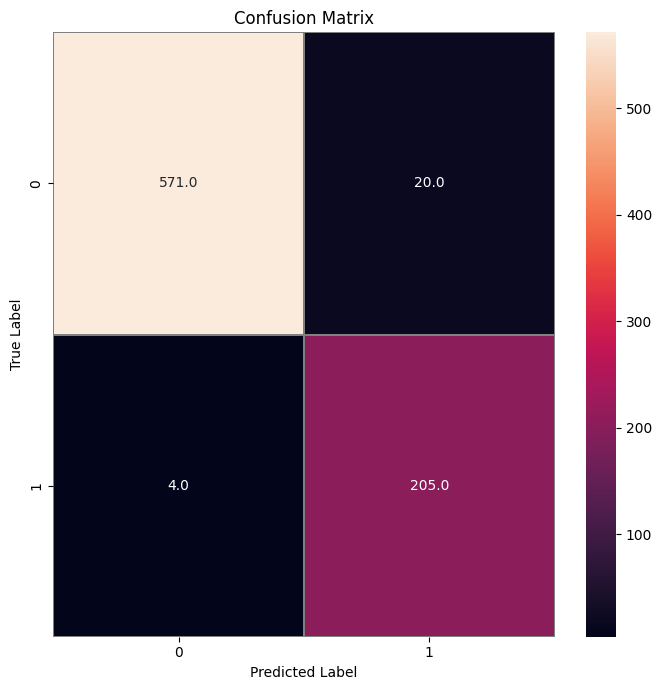

In [57]:
from sklearn import metrics
import seaborn as sns
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# Compute the confusion matrix

print("\n""Test Accuracy Score : ",metrics.accuracy_score(Y_true, Y_pred_classes),"\n")

fig, axis = plt.subplots(1, 3, figsize=(20,6))
axis[0].plot(history.history['val_accuracy'], label='val_acc')
axis[0].set_title("Validation Accuracy")
axis[0].set_xlabel("Epochs")
axis[0].set_ylabel("Val. Acc.")
axis[1].plot(history.history['accuracy'], label='acc')
axis[1].set_title("Training Accuracy")
axis[1].set_xlabel("Epochs")
axis[0].set_ylabel("Train. Acc.")
axis[2].plot(history.history['val_loss'], label='val_loss')
axis[2].set_title("Test Loss")
axis[2].set_xlabel("Epochs")
axis[2].set_ylabel("Loss")

plt.show()

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# Plot the confusion matrix
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()

plt.show()

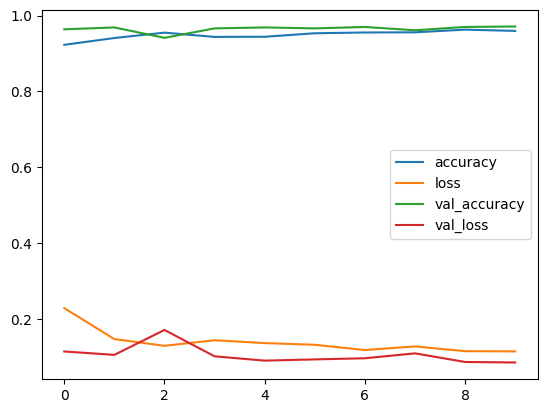

In [58]:
pd.DataFrame(history.history).plot();

### Now we can predict our test data with CNN. 

### Prediction on some pictures from dataset

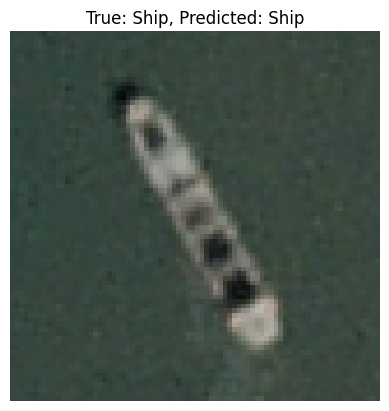

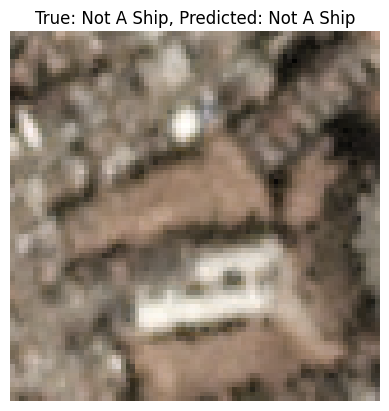

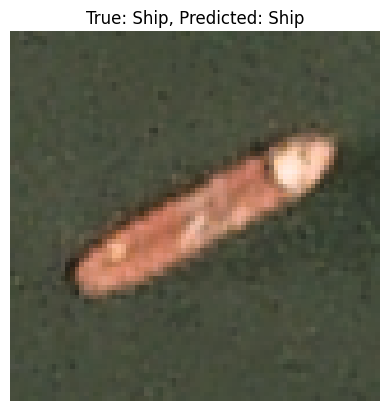

In [59]:
def plot_image_with_prediction(image_array, true_label, predicted_label):
    plt.imshow(image_array)
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

# Create DataFrame with predictions and images
y_test_data = pd.DataFrame(y_test, columns=["Not A Ship", "Ship"])
y_test_data["Predicted"] = Y_pred_classes
y_test_data["True"] = Y_true
y_test_data["Image"] = list(x_test)

# Display the first 3 images with their predictions
for i in range(3):
    img = y_test_data["Image"].iloc[i]
    true_label = "Ship" if y_test_data["True"].iloc[i] == 1 else "Not A Ship"
    predicted_label = "Ship" if y_test_data["Predicted"].iloc[i] == 1 else "Not A Ship"
    plot_image_with_prediction(img, true_label, predicted_label)

### Prediction on Random pictures from Dataset

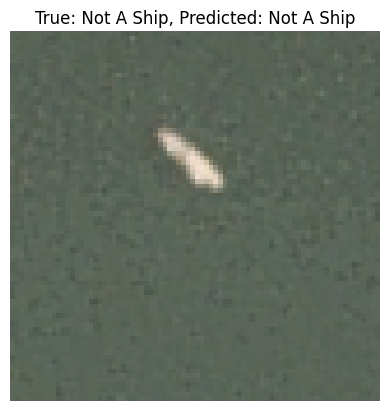

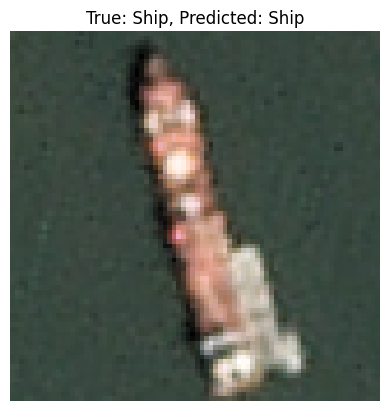

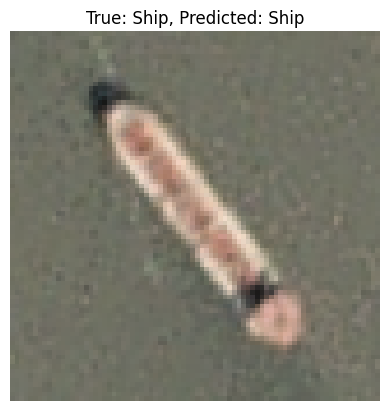

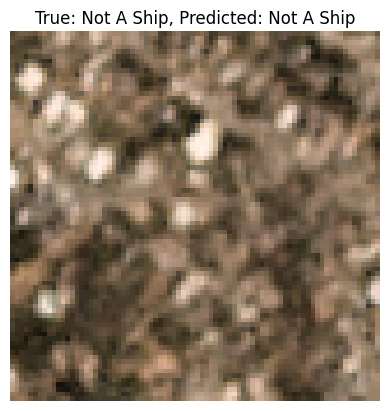

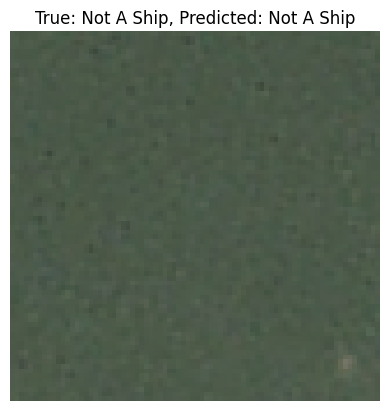

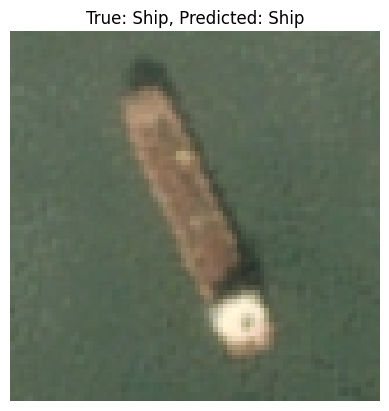

In [60]:
def plot_image_with_prediction(image_array, true_label, predicted_label):
    plt.imshow(image_array)
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

# Create DataFrame with predictions and images
y_test_data = pd.DataFrame(y_test, columns=["Not A Ship", "Ship"])
y_test_data["Predicted"] = Y_pred_classes
y_test_data["True"] = Y_true
y_test_data["Image"] = list(x_test)

# Randomly select 6 indices
random_indices = np.random.choice(y_test_data.index, size=6, replace=False)

# Display 6 random images with their predictions
for i in random_indices:
    img = y_test_data["Image"].iloc[i]
    true_label = "Ship" if y_test_data["True"].iloc[i] == 1 else "Not A Ship"
    predicted_label = "Ship" if y_test_data["Predicted"].iloc[i] == 1 else "Not A Ship"
    plot_image_with_prediction(img, true_label, predicted_label)

### Prediction on Any Picture from Google

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


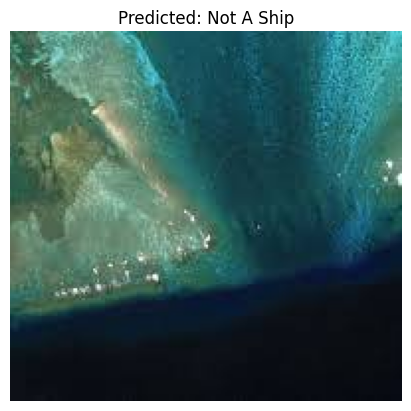

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


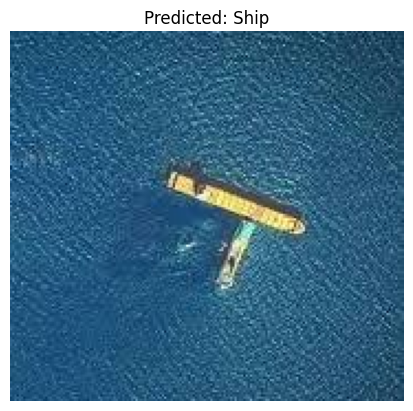

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


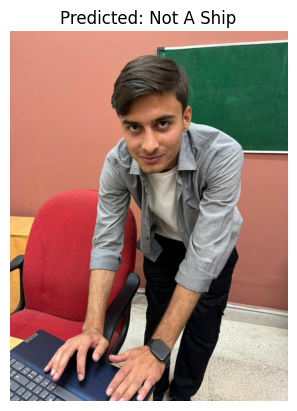

In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
def load_and_preprocess_image(image_path, target_size=(80, 80)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dims to match the input shape
    img_array /= 255.0  # Normalize to the range [0, 1]
    return img_array

# Function to predict and plot image from a given path
def predict_and_plot_image(image_path):
    img_array = load_and_preprocess_image(image_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_label = "Ship" if predicted_class == 1 else "Not A Ship"
    
    # Load image again for displaying (since img_array is preprocessed)
    img = load_img(image_path)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

# Example usage with an image path
image_path1 = "C:\\Users\\AWCD\\Downloads\\image2.jpg"
image_path2 = "C:\\Users\\AWCD\\Downloads\\images5.jpg"
image_path4 = "C:\\Users\\AWCD\\Downloads\\imageeee.jpg"
predict_and_plot_image(image_path1)
predict_and_plot_image(image_path2)
predict_and_plot_image(image_path4)

# Conclusion:

Our ship detection model, trained over 49 epochs, achieved remarkable performance with an accuracy of approximately 98.03% on the evaluation dataset. Starting with an initial accuracy of 68.7%, the model rapidly improved, reaching a validation accuracy of 98.04. This impressive outcome demonstrates the effectiveness of Convolutional Neural Networks in accurately identifying ships within images. With further refinement, this model holds significant potential for real-world applications in maritime surveillance and satellite imagery analysis.